In [33]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Exploratory Data Analysis 

In [34]:
# Reading the data
train = pd.read_csv('train.csv')

In [35]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [37]:
# Checking for columns that have null values
null_counts = train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

rez_esc      7928
v18q1        7342
v2a1         6860
SQBmeaned       5
meaneduc        5
dtype: int64

In [38]:
# Replacing the null values in the rez_esc column with zeros
# The rez_esc column appears to contain null values where there should be zeros
train['rez_esc'] = train['rez_esc'].fillna(0)

In [39]:
# Checking the number of households with no tablets
train['v18q'].value_counts()

0    7342
1    2215
Name: v18q, dtype: int64

In [40]:
# The null values in this column can be safely assumed to be households without tablets because the numbers line up perfectly
# with that assumption taking into account information in the v18q column
train['v18q1'] = train[['v18q1']].fillna(0)

In [41]:
# Checking the contents of this column
train['v2a1'].value_counts()

150000.0     233
100000.0     181
200000.0     159
120000.0     149
50000.0      118
80000.0      104
90000.0       81
70000.0       79
180000.0      77
300000.0      76
250000.0      75
40000.0       72
60000.0       57
130000.0      53
350000.0      53
110000.0      53
30000.0       48
160000.0      46
170000.0      41
140000.0      39
220000.0      30
0.0           29
570540.0      25
45000.0       25
175000.0      23
400000.0      22
20000.0       22
25000.0       21
285270.0      21
35000.0       20
            ... 
176000.0       2
420000.0       2
52000.0        2
100297.0       2
155000.0       2
159751.0       2
102000.0       2
58731.0        2
278000.0       2
32600.0        2
470000.0       2
2353477.0      2
44000.0        2
93000.0        2
275000.0       2
288750.0       2
325000.0       2
16000.0        2
219087.0       2
234000.0       1
249896.0       1
125518.0       1
25310.0        1
510000.0       1
253000.0       1
119813.0       1
268153.0       1
542013.0      

In [42]:
# Null values cannot be safely imputed for this column so this column is dropped
train = train.drop('v2a1', axis=1)

In [43]:
# Checking the SQBmeaned column
train['SQBmeaned'].describe()

count    9552.000000
mean      102.588867
std        93.516890
min         0.000000
25%        36.000000
50%        81.000000
75%       134.560010
max      1369.000000
Name: SQBmeaned, dtype: float64

In [44]:
# Checking the meaneduc column
train['meaneduc'].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

In [45]:
# filling null values in those columns with the mean value for the column
train['SQBmeaned'] = train[['SQBmeaned']].fillna(102.58886699019641)
train['meaneduc'] = train[['meaneduc']].fillna(9.231522935701435)

In [46]:
# checking there are no more null values
null_counts = train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [47]:
# finding columns that have object type data
y=-1
for x in range(0,139):

    y+=1
    if train.iloc[:,x].dtype == 'object':
        
        print(y , train.iloc[:,x].dtype)


0 object
94 object
99 object
100 object
101 object


In [48]:
train.iloc[:, 92:102].head()

,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa
0,0,0,21eb7fcc1,0,1,0,1,no,10,no
1,0,0,0e5d7a658,0,1,1,1,8,12,no
2,0,0,2c7317ea8,0,1,1,1,8,no,11
3,0,0,2b58d945f,2,2,0,4,yes,11,no
4,0,0,2b58d945f,2,2,0,4,yes,11,no


In [49]:
# listed on kaggle as 
# (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
# actual column contains mostly yes or no, instead of expected numbers
# there is no indication as to what numbers yes and no corrolate to so the data is not usefull

train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
3.5            18
1.25           18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.22222222      11
.83333331      11
.2857143        9
1.6666666       8
.60000002       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [50]:
# kaggle listed as
# years of education of male head of household, based on the interaction of escolari (years of education), 
# head of household and gender, yes=1 and no=0
# appears redundant as other columns describe the education levels of each individual and if they are head of the 
# household

train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [51]:
# kaggle listed as
# years of education of female head of household, based on the interaction of escolari (years of education),
# head of household and gender, yes=1 and no=0
# appears redundant as other columns describe the education levels of each individual and if they are head of the 
# household

train['edjefa'].value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [52]:
# Droping redundant and nonsensical columns

train = train.drop(columns=['edjefa','edjefe', 'dependency','Id'])

In [53]:
# Creating a list of households to replace idhogar column
l = [0]
y = 0
for x in range(1,9557):
    if train['idhogar'][x] != train['idhogar'][x-1]:
        y += 1
    l.append(y)
    

In [54]:
# Adding that as a column to the data frame
train['houseID'] = l

In [55]:
# Dropping the idhogar column
train = train.drop('idhogar', axis = 1)

In [56]:
# Checking that all of the data is of the correct type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 138 entries, hacdor to houseID
dtypes: float64(7), int64(131)
memory usage: 10.1 MB


# Visual Analysis

### What Do Households of Different Income Levels Own?

From this information it can be safely determined that owning a computer and television and the number of mobile phones in 
the household will provide a strong indicator of the income level, where as, number of tablets will not be as useful of
an indicator.

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


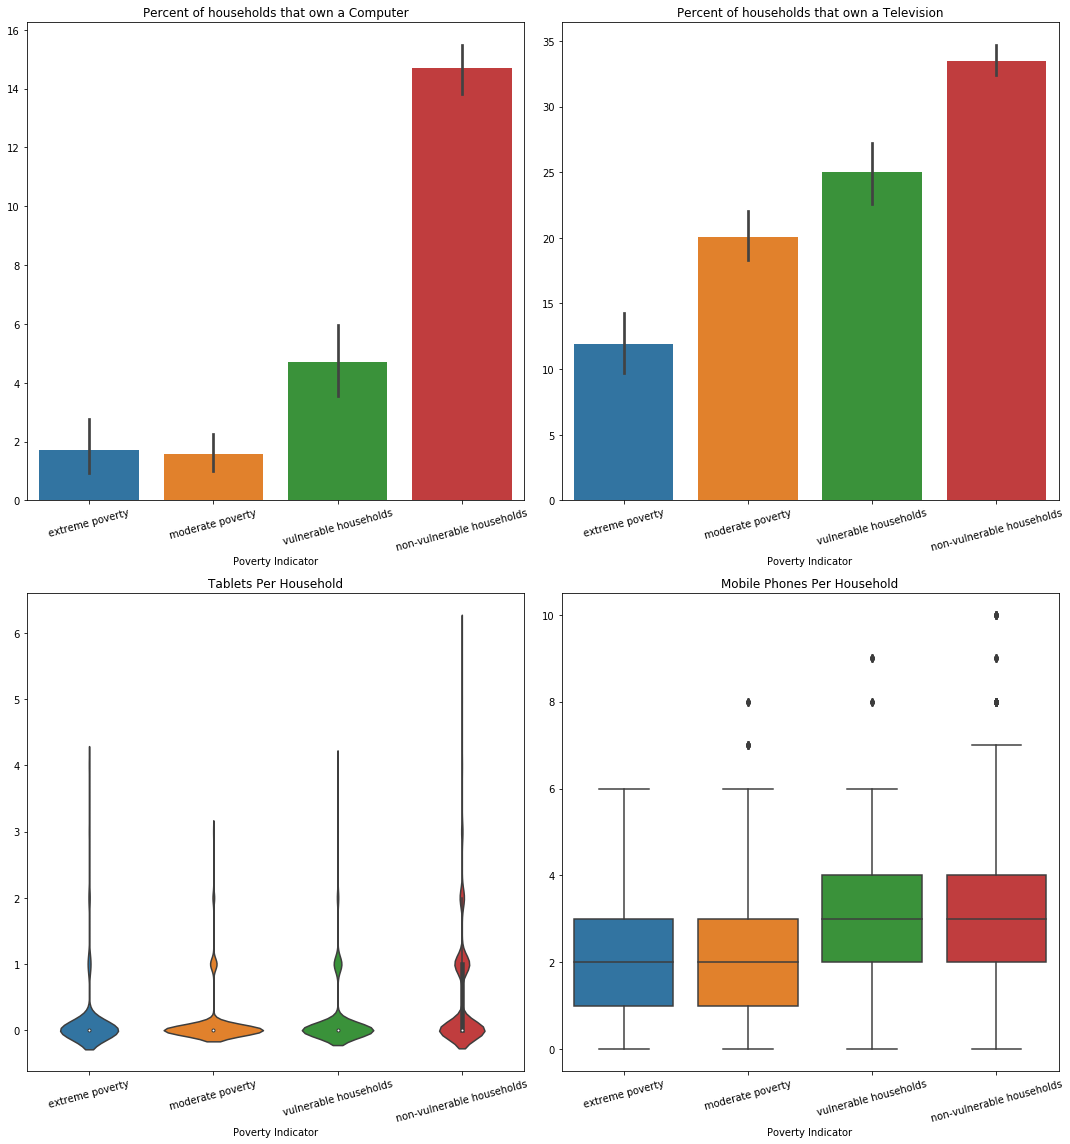

In [29]:

plt.figure(figsize = (15,16))
plt.subplot(2,2,1)
sns.barplot(y=(train['computer']) * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)

plt.title('Percent of households that own a Computer')
plt.xlabel('Poverty Indicator')
plt.ylabel('')

plt.subplot(2,2,2)
sns.barplot(y=(train['television']) * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Percent of households that own a Television')
plt.xlabel('Poverty Indicator')
plt.ylabel('')

plt.subplot(2,2,3)
sns.violinplot(data=train, y='v18q1', x='Target').set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Tablets Per Household')
plt.xlabel('Poverty Indicator')
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(data=train, y='qmobilephone', x='Target').set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Mobile Phones Per Household')
plt.xlabel('Poverty Indicator')
plt.ylabel('')
plt.tight_layout()


### Wall Material By Income Level

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(811.294,0.5,'')

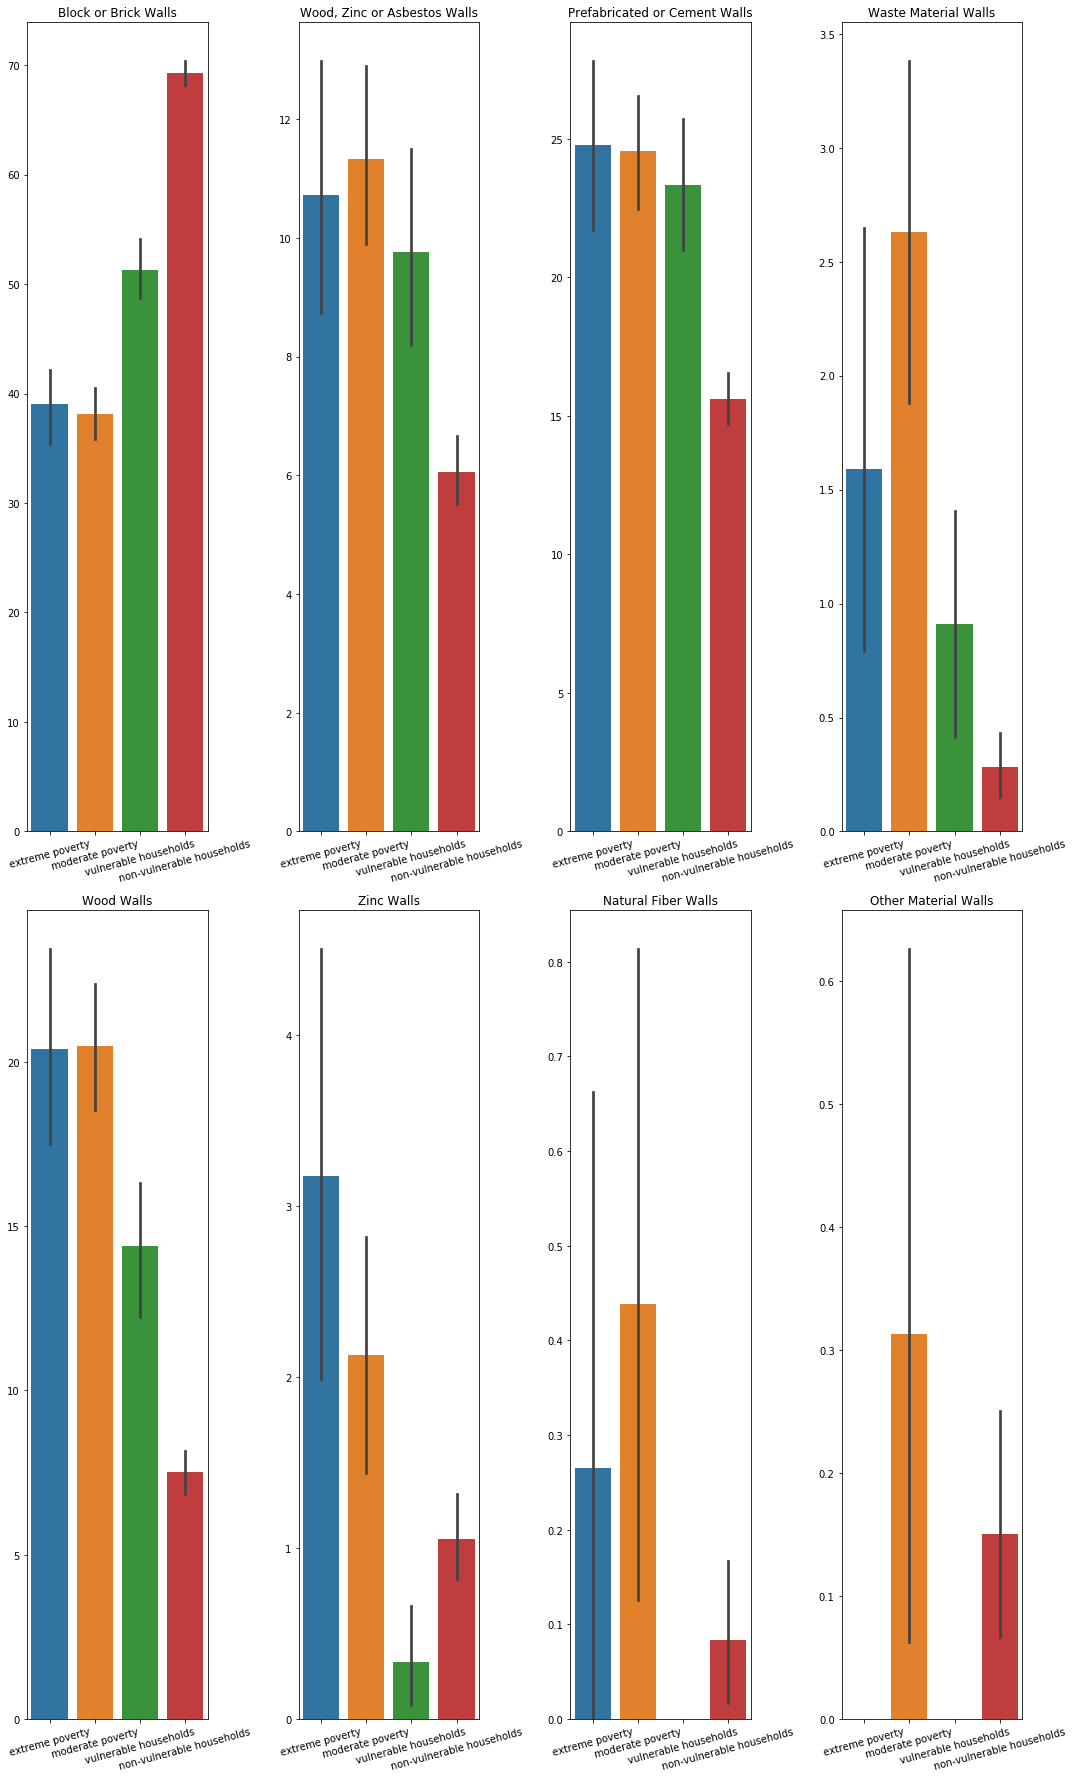

In [29]:

plt.figure(figsize = (15,25))
plt.subplot(2,4,1)
sns.barplot(y=train['paredblolad'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Block or Brick Walls')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,2)
sns.barplot(y=train['paredzocalo'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Wood, Zinc or Asbestos Walls')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,3)
sns.barplot(y=train['paredpreb'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Prefabricated or Cement Walls')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,4)
sns.barplot(y=train['pareddes'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Waste Material Walls')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,5)
sns.barplot(y=train['paredmad'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Wood Walls')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,6)
sns.barplot(y=train['paredzinc'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Zinc Walls')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,7)
sns.barplot(y=train['paredfibras'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Natural Fiber Walls')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,4,8)
sns.barplot(y=train['paredother'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Other Material Walls')
plt.xlabel('')
plt.ylabel('')


From these plots we can see that the wall type will help provide a strong indicator of the income level.

### Floor Material By Income Level

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(859.577,0.5,'')

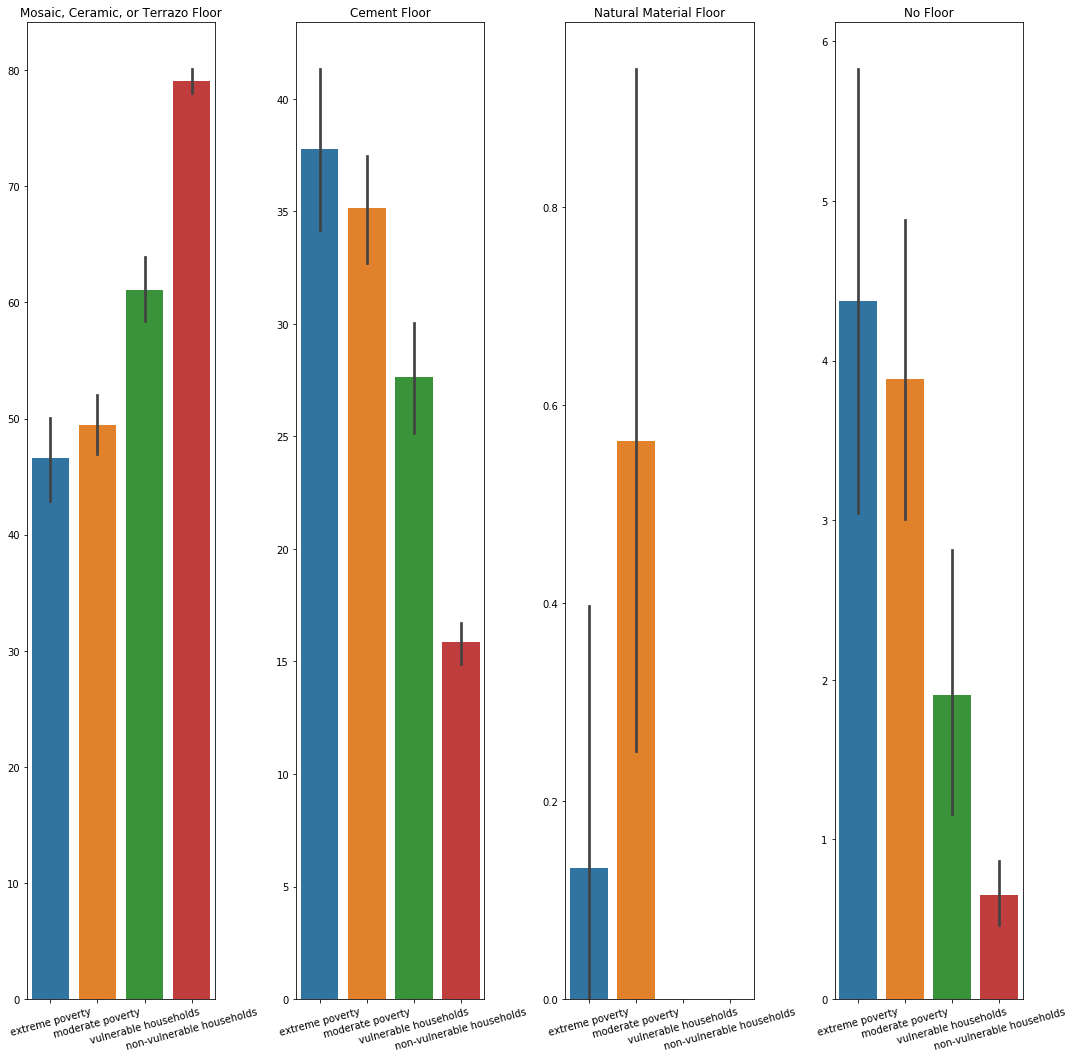

In [30]:

plt.figure(figsize = (15,15))
plt.subplot(1,4,1)
sns.barplot(y=train['pisomoscer'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Mosaic, Ceramic, or Terrazo Floor')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,2)
sns.barplot(y=train['pisocemento'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Cement Floor')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,3)
sns.barplot(y=train['pisonatur'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Natural Material Floor')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,4)
sns.barplot(y=train['pisonotiene'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('No Floor')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')


From these plots we can see that the floor type will help provide a strong indicator of the income level.

### Roof Material By Income Level

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(852.122,0.5,'')

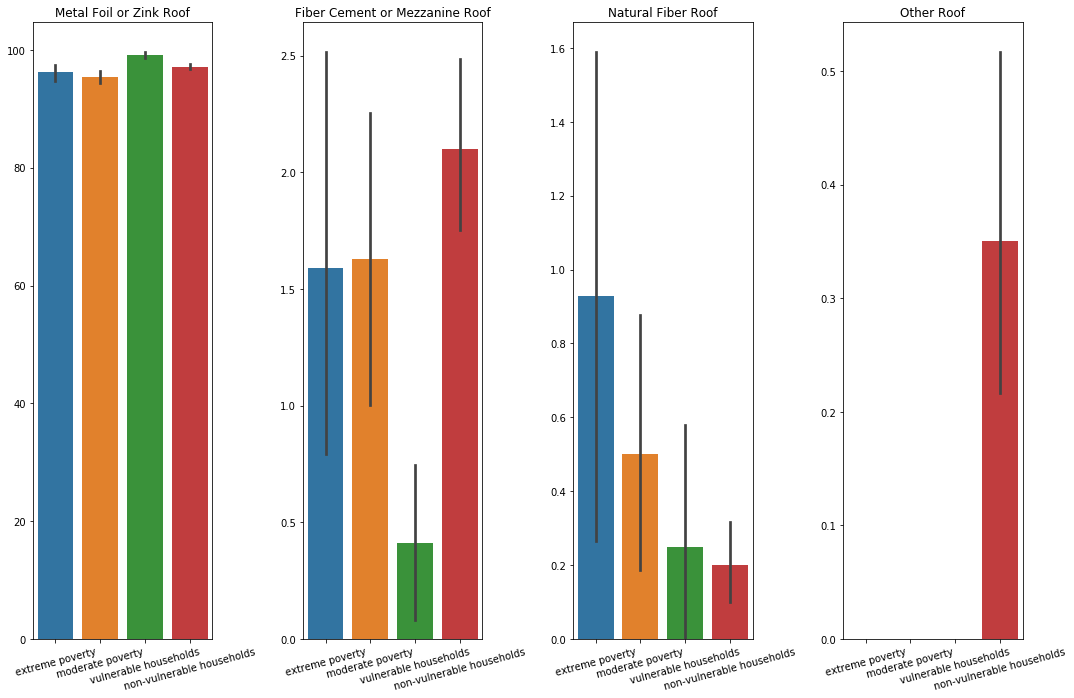

In [31]:

plt.figure(figsize = (15,10))
plt.subplot(1,4,1)
sns.barplot(y=train['techozinc'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Metal Foil or Zink Roof')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,2)
sns.barplot(y=train['techoentrepiso'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Fiber Cement or Mezzanine Roof')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,3)
sns.barplot(y=train['techocane'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Natural Fiber Roof')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,4)
sns.barplot(y=train['techootro'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Other Roof')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')


Since there is such a strong majority of metal foil or zink roofs, this information is not very useful for determining income level.

### Water Supply By Income Level

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(735.94,0.5,'')

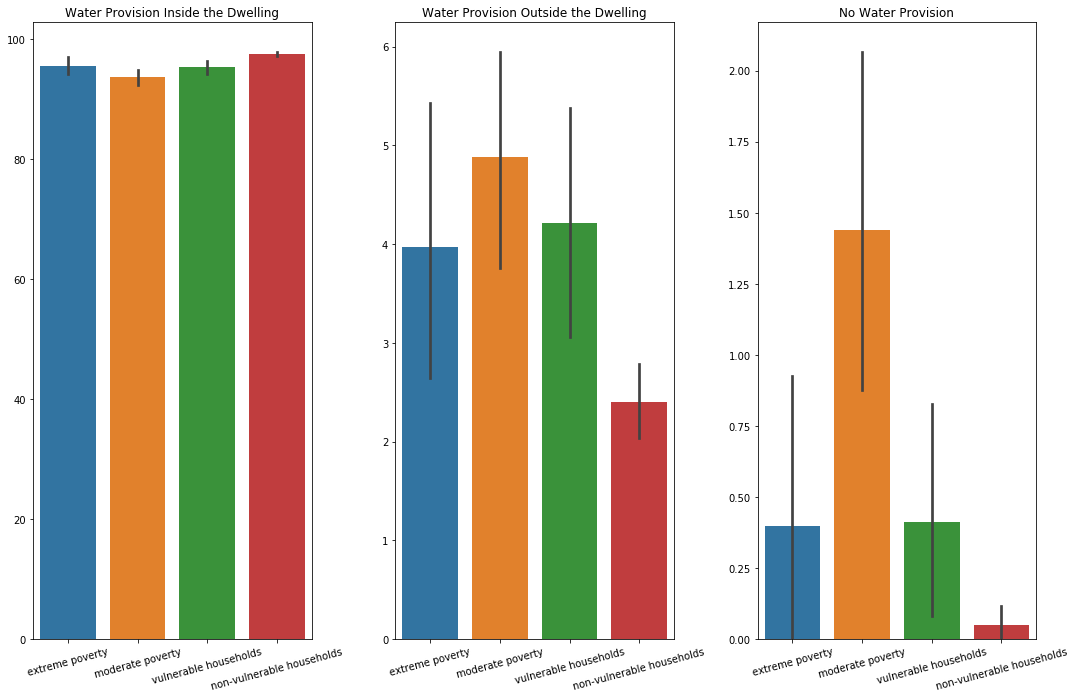

In [32]:

plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.barplot(y=train['abastaguadentro'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Water Provision Inside the Dwelling')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,3,2)
sns.barplot(y=train['abastaguafuera'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Water Provision Outside the Dwelling')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,3,3)
sns.barplot(y=train['abastaguano'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('No Water Provision')
plt.xlabel('')
plt.ylabel('')


From these plots we can see that the water source will not provide a very usefull indicator of income level, as the vast majority of water comes from provisions inside the dwelling

### Electricity Provider By Income 

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(853.67,0.5,'')

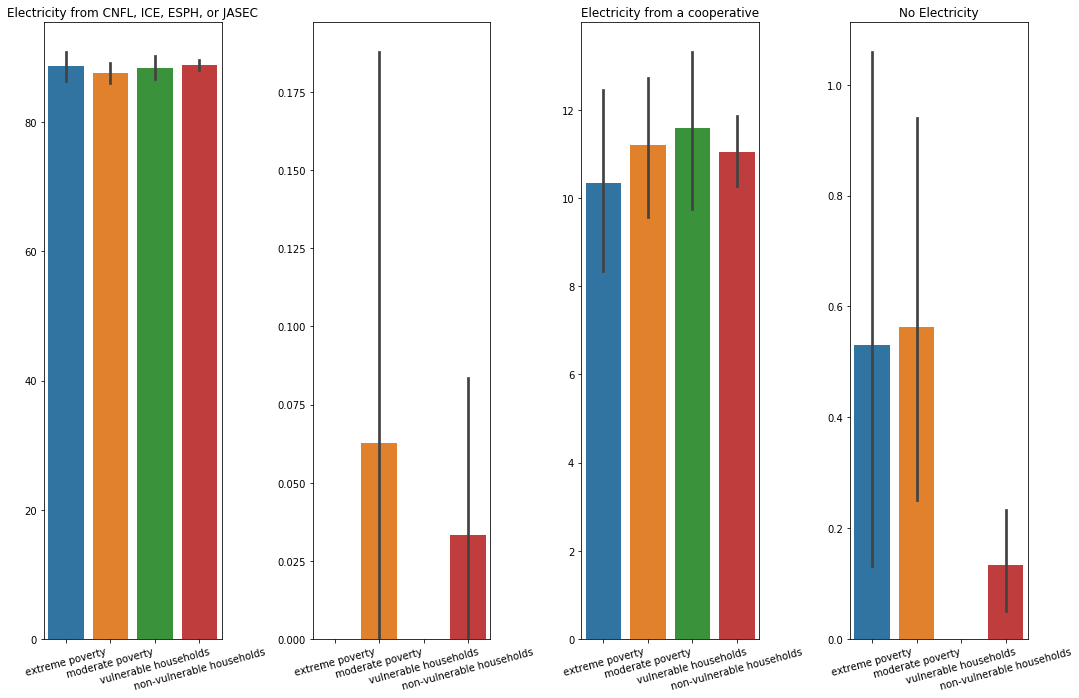

In [33]:

plt.figure(figsize = (15,10))
plt.subplot(1,4,1)
sns.barplot(y=train['public'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Electricity from CNFL, ICE, ESPH, or JASEC')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,2)
sns.barplot(y=train['planpri'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('')
plt.xlabel('Electricity from Private Plant')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,3)
sns.barplot(y=train['coopele'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('Electricity from a cooperative')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,4,4)
sns.barplot(y=train['noelec'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.tight_layout()
plt.title('No Electricity')
plt.xlabel('Poverty Indicator')
plt.xlabel('')
plt.ylabel('')


From these plots we can see that electricity provider will not provide a valuable indicator of economic level, as there are no trends that can be seen between the different providers.

### Level of Education By Income Level

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


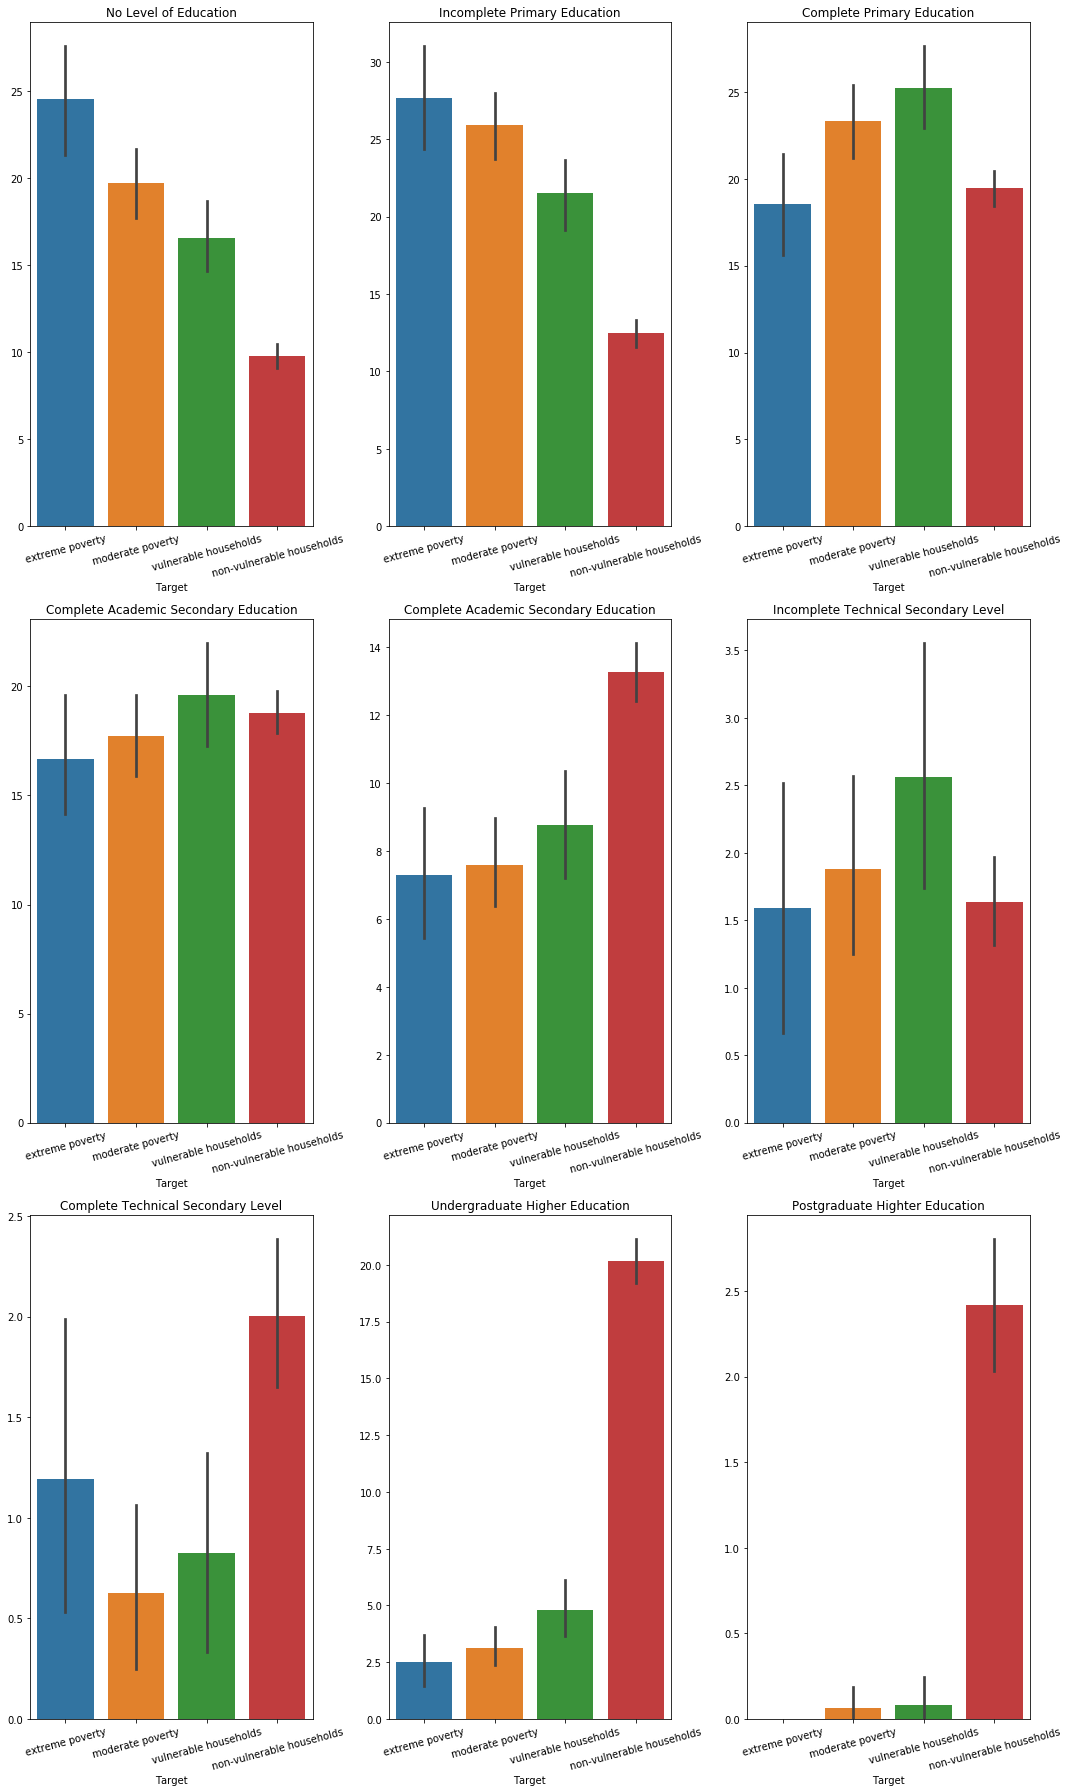

In [34]:

plt.figure(figsize = (15,25))

plt.subplot(3,3,1)
sns.barplot(y=train['instlevel1'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('No Level of Education')
plt.ylabel('')


plt.subplot(3,3,2)
sns.barplot(y=train['instlevel2'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Incomplete Primary Education')
plt.ylabel('')


plt.subplot(3,3,3)
sns.barplot(y=train['instlevel3'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Complete Primary Education')
plt.ylabel('')


plt.subplot(3,3,4)
sns.barplot(y=train['instlevel4'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Complete Academic Secondary Education')
plt.ylabel('')


plt.subplot(3,3,5)
sns.barplot(y=train['instlevel5'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Complete Academic Secondary Education')
plt.ylabel('')


plt.subplot(3,3,6)
sns.barplot(y=train['instlevel6'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Incomplete Technical Secondary Level')
plt.ylabel('')


plt.subplot(3,3,7)
sns.barplot(y=train['instlevel7'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Complete Technical Secondary Level')
plt.ylabel('')


plt.subplot(3,3,8)
sns.barplot(y=train['instlevel8'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Undergraduate Higher Education')
plt.ylabel('')


plt.subplot(3,3,9)
sns.barplot(y=train['instlevel9'] * 100, x=train['Target']).set_xticklabels(
    ('extreme poverty', 'moderate poverty', 'vulnerable households', 'non-vulnerable households'), rotation =15)
plt.title('Postgraduate Highter Education')
plt.ylabel('')


plt.tight_layout()

From these graphs it is clear that education level is a strong indicator for income level.

### People Living in the Household By Rooms in House for each income level

C:\Users\Cam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(25.2935,0.5,'Rooms in the household')

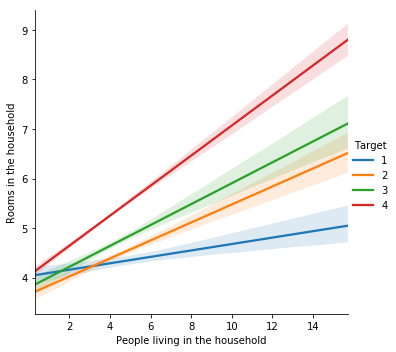

In [35]:
sns.lmplot(x = 'tamviv' , y='rooms', data = train, hue = 'Target', scatter=False)
plt.xlabel('People living in the household')
plt.ylabel('Rooms in the household')


We can see from this visualization that higher income households have a higher positive correlation between number of rooms in the house and the number of people living there.

## EDA Conclusions

From my exploration of the data I have concluded that the type of information about the households that can act as predictors of income level is not exactly what I would have expected it to be. Factors such as, owning a computer or a television and how many mobile phones the household has can provide insight into income, but surprisingly tablets owned by the household proved to be less revealing. The wall and floor material of the house can be useful for determining income level, but the roof material was less useful because, there was such a strong majority towards one material. The water source and electricity provider for the household, also proved to be not useful indicators as the water source and electricity provider had strong majorities for all income levels of one type. The highest level of education completed is a very useful indicator of income level, there are very visible trends present in this data. It can also be seen from the data that higher income houses were more likely to have a better ratio of people living in the household compared to the number of rooms present in the household. This analysis of the data tells me that important areas to focus on in my further analysis should be, number and ownership of technological devices (with the exception of tablets), wall material, roof material, education level, and the amount of rooms in the house divided by the number of people living there. 

# Statistical Analysis

In [36]:
# Creating a function to check for correlation
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


In [37]:
# Checking for corelation between no education and need
y=train['instlevel1'] 
x=train['Target']

r_obs = pearson_r(x,y)

print(r_obs)

# Initializing permutation replicates
perm_replicates = np.empty(10000)

# Drawing replicates
for i in range(10000):
    # Permute measurments: 
    perm = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm, y)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('p-val =', p)

-0.14788333636003465
p-val = 0.0


Negative value shows that there is a correlation between having no education and being in more need. The very low p values shows that this is unlikely to have occured by chance.

In [38]:
#Checking for correlation between higher education completed and need
y=train['instlevel8']
x=train['Target']

r_obs = pearson_r(x,y)
print(r_obs)

# Initialize permutation replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: 
    perm = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm, y)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

0.21435122056421005
p-val = 0.0


Positive value shows that there is a correlation between having a college education and being in less need. The very low p values shows that this is unlikely to have occured by chance.

In [39]:
# Checking for correlation between Mosaic, Ceramic, or Terrazo Floor and need
y=train['pisomoscer']
x=train['Target']

r_obs = pearson_r(x,y)
print(r_obs)

# Initialize permutation replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: 
    perm = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm, y)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)


0.2802843798663786
p-val = 0.0


The positive value shows that there is a correlation between having a Mosaic, Ceramic, or Terrazo floor and being in less need. The very low p values shows that this is unlikely to have occured by chance.

In [40]:
# Checking for correlation between Cement Floor
y=train['pisocemento'] 
x=train['Target']

r_obs = pearson_r(x,y)
print(r_obs)

# Initialize permutation replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: 
    perm = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm, y)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('p-val =', p)


-0.20543914557544027
p-val = 0.0


The negative value shows that there is a correlation between having cement floor and being in more need. The very low p values shows that this is unlikely to have occured by chance.

In [41]:
# Checking for correlation between owning a computer and need
y=train['computer'] 
x=train['Target']

r_obs = pearson_r(x,y)
print(r_obs)

# Initialize permutation replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: 
    perm = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm, y)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)


0.18311281130543267
p-val = 0.0


The positive value shows that there is a correlation between having a computer and being in less need. The very low p values shows that this is unlikely to have occured by chance.

In [42]:
# Checking for correlation between owning a television and need
y=train['television'] 
x=train['Target']

r_obs = pearson_r(x,y)
print(r_obs)

# Initialize permutation replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: 
    perm = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(perm, y)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)


0.157064993237781
p-val = 0.0


The positive value shows that there is a correlation between having a television and being in less need. The very low p values shows that this is unlikely to have occured by chance.

## Statistical Analysis Conclusions
The statistical analysis that I conducted has helped to reveal some of the columns that may be of interest for further study and ones that could be useful to my machine learning models

# Machine Learning

The next step I wanted to do was to test some machine learning techniques on this dataset to try to determine the most effective method. The scoring metric that was used for the competition was the macro f1-score, so that is the metric that I am going to try to optimize for.

In [43]:
# Performing the imports 
from sklearn.model_selection import train_test_split

# Splitting the training data into training and testing sets
X = train.drop(['Target','houseID'], axis=1)
y = train['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Random Forest
The first machine learning method that I wanted to try was a random forest because, it is very versatile and lightweight, so it can give me a quick idea of what can be done with the data. 

In [44]:
# Performing the imports 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Setting up the random forest
rfc = RandomForestClassifier(n_estimators=500)

# Fitting a random forest to the data
rfc.fit(X_train, y_train)

# Predicting
pred = rfc.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred, average='macro')))

C:\Users\Cam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[ 157   18    1   47]
 [   9  384   10   65]
 [   1   15  251   92]
 [   2    4    3 1809]]


             precision    recall  f1-score   support

          1       0.93      0.70      0.80       223
          2       0.91      0.82      0.86       468
          3       0.95      0.70      0.80       359
          4       0.90      1.00      0.94      1818

avg / total       0.91      0.91      0.90      2868



macro f1-score 0.8534501352127961


Without doing anything to the data we can see that the random forest gives us a respectable average f1-score on the data of 0.85.  We will be looking for ways to improve this score as we continue.

### Support Vector Machine
The next technique that I wanted to try was using a support vector machine. Since the classification problem is categorical in nature this method seems appropriate to try. Before giving the data to the support vector machine I will need to scale it to prevent columns with a larger range from dominating other columns. I will be using a pipeline to scale the data and fit/predict with the model in one step.

In [45]:
# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


# Creating a pipeline 
svcpl = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC())
    ])

# Fitting model to scaled data
svcpl.fit(X_train, y_train)

# Predicting
pred2 = svcpl.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred2))
print('\n')
print(classification_report(y_test, pred2))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred2, average='macro')))

[[  77   43    1  102]
 [   6  245    2  215]
 [   5   43   67  244]
 [   0   24    0 1794]]


             precision    recall  f1-score   support

          1       0.88      0.35      0.50       223
          2       0.69      0.52      0.60       468
          3       0.96      0.19      0.31       359
          4       0.76      0.99      0.86      1818

avg / total       0.78      0.76      0.72      2868



macro f1-score 0.5656817478480233


Running the support vector machine with the default parameters gave me a bad f1-score. The next step was to use a grid search to look for the optimal parameters to see if we could improve on that score.

In [46]:
# Importing grid search
from sklearn.model_selection import GridSearchCV

# Setting up grid search to find the ideal C and gamma
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[.1,1,.01,.001,.0001]}

# Scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)
grid = GridSearchCV(SVC(), param_grid, verbose=3)

# Fitting the grid search
grid.fit(scaled, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6241039426523297, total=   7.4s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, score=0.6249439210408255, total=   7.4s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, score=0.6247755834829444, total=   7.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6241039426523297, total=   7.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6249439210408255, total=   7.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6247755834829444, total=   7.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6241039426523297, total=   4.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6249439210408255, total=   4.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6247755834829444, total=   4.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ...... C=1000, gamma=0.1, score=0.6514336917562724, total=   7.9s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.6509645580978017, total=   7.8s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.6499102333931778, total=   7.9s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6388888888888888, total=   8.1s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6379542395693136, total=   8.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6395870736086176, total=   8.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ...... C=1000, gamma=0.01, score=0.796146953405018, total=   6.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 10.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [47]:
# Printing the best parameters
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [48]:
# Creating a pipeline with best params
svcploptimal = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC(C=10, gamma=0.01))
    ])

# Fitting model to scaled data
svcploptimal.fit(X_train, y_train)

# Predicting
pred3 = svcploptimal.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred3))
print('\n')
print(classification_report(y_test, pred3))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred3, average='macro')))

[[ 137   29   11   46]
 [  19  355   19   75]
 [   9   36  213  101]
 [   5   26   35 1752]]


             precision    recall  f1-score   support

          1       0.81      0.61      0.70       223
          2       0.80      0.76      0.78       468
          3       0.77      0.59      0.67       359
          4       0.89      0.96      0.92      1818

avg / total       0.85      0.86      0.85      2868



macro f1-score 0.7667041784952975


Using the optimal parameters appears to have resulted in only a minor improvement in this case. Even with these optimal parameters the support vector machine is outperformed by the random forest.

### K-Nearest Neighbors
Since the support vector machine worked alright on the data the next thing that I wanted to try out was K nearest neighbors. Like the SVM, this algorithm performs better with the scaled data. As a result, I will be creating another pipeline.


In [49]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier

# Creating a pipeline
knnpl = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier())
    ])

# Fitting model to scaled data
knnpl.fit(X_train, y_train)

# Predicting
pred4 = knnpl.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred4))
print('\n')
print(classification_report(y_test, pred4))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred4, average='macro')))

[[ 110   24   14   75]
 [  15  272   19  162]
 [  15   49  147  148]
 [  20   74   58 1666]]


             precision    recall  f1-score   support

          1       0.69      0.49      0.57       223
          2       0.65      0.58      0.61       468
          3       0.62      0.41      0.49       359
          4       0.81      0.92      0.86      1818

avg / total       0.75      0.77      0.75      2868



macro f1-score 0.6353456398089043


Running the K nearest neighbors with default parameters gave me a f1-score that is not very good. The next step was to search for the optimal K value to see if we could improve on that score.

In [50]:
# Scaling the data 
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)

# Elbow method for finding best k value
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_train, y_train)
    pred_i = knn.predict(scaled_test)
    error_rate.append(np.mean(f1_score(y_test, pred_i, average="macro")))

Text(0,0.5,'f1-score')

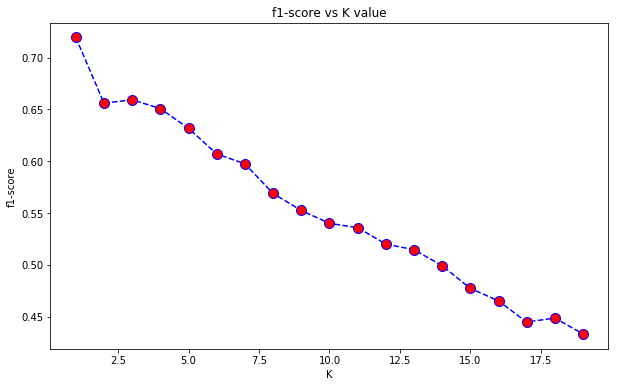

In [51]:
# Plotting the K values
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color= 'blue', linestyle = 'dashed', 
         marker  = 'o', markerfacecolor = 'red', markersize=10)
plt.title('f1-score vs K value')
plt.xlabel('K')
plt.ylabel('f1-score')

In [52]:
# Creating a pipeline with optimal K
knnploptimal = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=1))
    ])

# Fitting model to scaled data
knnploptimal.fit(X_train, y_train)

# Predicting
pred5 = knnploptimal.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred5))
print('\n')
print(classification_report(y_test, pred5))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred5, average='macro')))

[[ 139   29    9   46]
 [  24  331   27   86]
 [  16   34  219   90]
 [  36   75   91 1616]]


             precision    recall  f1-score   support

          1       0.65      0.62      0.63       223
          2       0.71      0.71      0.71       468
          3       0.63      0.61      0.62       359
          4       0.88      0.89      0.88      1818

avg / total       0.80      0.80      0.80      2868



macro f1-score 0.7116290472595159


Using the optimal K value resulted in a minor improvement in this case, but even with the optimal K value this model does not appear to be particularly useful for this problem. 

### Logistic Regression
The next algorithm that I wanted to try was logistic regression. Like KNN and SVM, this algorithm performs better with the data scaled, so I will be creating another pipeline.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logpl = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fitting model to scaled data
logpl.fit(X_train, y_train)

# Predicting
pred6 = logpl.predict(X_test)

# Evaluating the model
print(confusion_matrix(pred6, y_test))
print('\n')
print(classification_report(pred6,y_test))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred6, average='macro')))

[[  48   32   24    8]
 [  84  185   58   83]
 [   5   25   40   25]
 [  86  226  237 1702]]


             precision    recall  f1-score   support

          1       0.22      0.43      0.29       112
          2       0.40      0.45      0.42       410
          3       0.11      0.42      0.18        95
          4       0.94      0.76      0.84      2251

avg / total       0.80      0.69      0.73      2868



macro f1-score 0.43019002505601855


The logistic regression solution gave me a very poor macro f1-score, so it will not be very useful for this data.

## Oversampling
The next thing that I wanted to try was to see if I could use data manipulation techniques to improve the accuracy of these machine learning algorithms. I noticed that the majority of the data was in the 4 column and I decided to use oversampling to make it so that the other columns are better represented to try to improve accuracy.

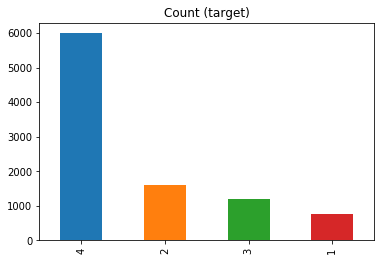

In [54]:
# Plotting the different need levels in the training set
train.Target.value_counts().plot(kind='bar', title='Count (target)')

In [55]:
# Creating a dataframe from the training data only
train_only = pd.concat([X_train, y_train], axis=1)

# Class counting
count_class_4, count_class_3, count_class_2, count_class_1 = train_only['Target'].value_counts()

# Dividing by class
df_class_1 = train_only[train_only['Target'] == 1]
df_class_2 = train_only[train_only['Target'] == 2]
df_class_3 = train_only[train_only['Target'] == 3]
df_class_4 = train_only[train_only['Target'] == 4]

Random over-sampling:
4    4178
3    4178
2    4178
1    4178
Name: Target, dtype: int64


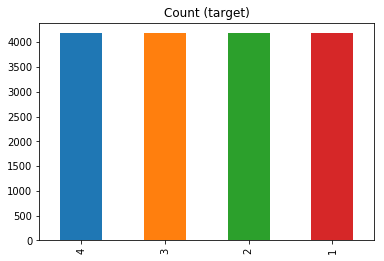

In [56]:
# Oversampling underrepresented classes
df_class_1_over = df_class_1.sample(count_class_4, replace=True)
df_class_2_over = df_class_2.sample(count_class_4, replace=True)
df_class_3_over = df_class_3.sample(count_class_4, replace=True)
train_over = pd.concat([df_class_4, df_class_1_over, df_class_2_over, df_class_3_over], axis=0)

# Printing the counts for each class 
print('Random over-sampling:')
print(train_over.Target.value_counts())

# Plotting the classes
train_over.Target.value_counts().plot(kind='bar', title='Count (target)')


In [57]:
# Splitting the data into X and y
X_train_over = train_over.drop(['Target'], axis=1)
y_train_over = train_over['Target']

### Random forest with oversampled data

In [58]:
# Creating the model
rfc = RandomForestClassifier(n_estimators=1000)

# Fitting the model
rfc.fit(X_train_over, y_train_over)

# Predicting
pred8 = rfc.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred8))
print('\n')
print(classification_report(y_test, pred8))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred8, average='macro')))

[[ 173   20    1   29]
 [  11  407   11   39]
 [   1   15  284   59]
 [   2    3    8 1805]]


             precision    recall  f1-score   support

          1       0.93      0.78      0.84       223
          2       0.91      0.87      0.89       468
          3       0.93      0.79      0.86       359
          4       0.93      0.99      0.96      1818

avg / total       0.93      0.93      0.93      2868



macro f1-score 0.8887118215716857


We can see a significant improvement with the random forest that was trained on the oversampled data when compared to the one trained on the regular data. 

### Logistic Regression with oversampled data

In [59]:
logpl = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fitting model to scaled data
logpl.fit(X_train_over, y_train_over)

# Predicting
pred9 = logpl.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred9))
print('\n')
print(classification_report(y_test, pred9))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred9, average='macro')))

[[ 124   48   27   24]
 [ 124  173  109   62]
 [  80   62  138   79]
 [ 142  130  284 1262]]


             precision    recall  f1-score   support

          1       0.26      0.56      0.36       223
          2       0.42      0.37      0.39       468
          3       0.25      0.38      0.30       359
          4       0.88      0.69      0.78      1818

avg / total       0.68      0.59      0.62      2868



macro f1-score 0.4573483413626137


We don't see much if any improvement in the macro f1-score when using the oversampled data with the logistic regression algorithm.

### Support Vector Machine with oversampled data

In [60]:
# Creating a pipeline with best params
svcploptimal = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SVC(C=10, gamma=0.01))
    ])

# Fitting model to scaled data
svcploptimal.fit(X_train_over, y_train_over)

# Predicting
pred10 = svcploptimal.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred10))
print('\n')
print(classification_report(y_test, pred10))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred10, average='macro')))

[[ 137   32   11   43]
 [  26  351   18   73]
 [  12   36  226   85]
 [  12   27   38 1741]]


             precision    recall  f1-score   support

          1       0.73      0.61      0.67       223
          2       0.79      0.75      0.77       468
          3       0.77      0.63      0.69       359
          4       0.90      0.96      0.93      1818

avg / total       0.85      0.86      0.85      2868



macro f1-score 0.7639151407169433


Using the oversampled data we see very little or no change with the support vector machine.

### K-Nearest Neighbors with oversampled data

In [61]:
# Creating a pipeline with optimal K
knnploptimal = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=1))
    ])

# Fitting model to scaled data
knnploptimal.fit(X_train_over, y_train_over)

# Predicting
pred11 = knnploptimal.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred11))
print('\n')
print(classification_report(y_test, pred11))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred11, average='macro')))

[[ 142   26    9   46]
 [  26  332   26   84]
 [  14   32  220   93]
 [  44   67   95 1612]]


             precision    recall  f1-score   support

          1       0.63      0.64      0.63       223
          2       0.73      0.71      0.72       468
          3       0.63      0.61      0.62       359
          4       0.88      0.89      0.88      1818

avg / total       0.80      0.80      0.80      2868



macro f1-score 0.7133773007107571


Using the oversampled data we see very little or no change with the KNN as well.

## Further improvements
Now that we have tried out several different models and determined that the random forest is going to be our most effective approach to this task, I have a few things to try to see if we can improve on the score.

### Boosting
The first thing that I wanted to try to improve the score was to use boosting to help the model train on points that it missed. I chose to use a regular decision tree for this task because, the random forest overfits when used with this technique.

In [62]:
# Importing Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting with decision trees
boost = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 500, learning_rate=.5)

# Boosting Classifier

boost.fit(X_train_over, y_train_over)

# Predicting
pred12 = boost.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred12))
print('\n')
print(classification_report(y_test, pred12))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred12, average='macro')))

[[ 169   22    8   24]
 [  12  378   22   56]
 [   5   32  267   55]
 [  14   56   38 1710]]


             precision    recall  f1-score   support

          1       0.84      0.76      0.80       223
          2       0.77      0.81      0.79       468
          3       0.80      0.74      0.77       359
          4       0.93      0.94      0.93      1818

avg / total       0.88      0.88      0.88      2868



macro f1-score 0.8232406839576534


Boosting works well with the decision trees and improves their performance over what they would have done by themselves, but they fail to outperform the random forest for this task. 

### Bagging
The next technique that I wanted to try was bagging with decision trees. This creates a model that is very similar to a random forest, but still has some important differences. Most importantly, bagging can be used to train full trees on all of the features of a subset of a dataset, whereas a random forest trains trees on some +
of the features of a subset of a dataset.

In [63]:
# Importing libraries
from sklearn.ensemble import BaggingClassifier

# Setting up the bagging classifier
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, 
                       n_estimators = 700)

# Fitting the model
bg.fit(X_train_over, y_train_over)

# Predicting
pred13 = bg.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred13))
print('\n')
print(classification_report(y_test, pred13))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred13, average='macro')))

[[ 180   22    4   17]
 [  14  417   14   23]
 [   5   13  305   36]
 [   3    8   21 1786]]


             precision    recall  f1-score   support

          1       0.89      0.81      0.85       223
          2       0.91      0.89      0.90       468
          3       0.89      0.85      0.87       359
          4       0.96      0.98      0.97      1818

avg / total       0.94      0.94      0.94      2868



macro f1-score 0.8960319272681039


The bagged decision trees give the best macro f1-score yet and outperforms the random forest on this data. 

### Voting
The last thing that I wanted to try to improve the score was using a voting classifier. This could be useful if there was something that some of the weaker machine learning techniques are picking up on that is being missed by the bagging classifier and the random forest.

In [64]:
# Importin voting classifier
from sklearn.ensemble import VotingClassifier

# Setting up the voting classifier
rfc = RandomForestClassifier(n_estimators=700)
rfc1 = RandomForestClassifier(n_estimators=700)
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, 
                       max_features=1.0, n_estimators = 700)
bg1 = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, 
                       max_features=1.0, n_estimators = 700)
svc = svcpl


evc = VotingClassifier(estimators=[('rfc', rfc), ('svc',svcploptimal), ('bg',bg),
                                   ('bg1',bg1)], voting='hard')

# Fitting the classifier
evc.fit(X_train_over, y_train_over)

# Predicting
pred14 = evc.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, pred14))
print('\n')
print(classification_report(y_test, pred14))
print('\n')
print('macro f1-score {}'.format(f1_score(y_test, pred14, average='macro')))

[[ 180   23    3   17]
 [  14  419   14   21]
 [   5   14  304   36]
 [   3    7   19 1789]]


             precision    recall  f1-score   support

          1       0.89      0.81      0.85       223
          2       0.90      0.90      0.90       468
          3       0.89      0.85      0.87       359
          4       0.96      0.98      0.97      1818

avg / total       0.94      0.94      0.94      2868



macro f1-score 0.8972496820461495


C:\Users\Cam\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The voting classifier performed well on this data but did not outperform the bagged decision trees. As a result, I will use the bagged decision trees for my final predictions.

## Machine Learning Conclusions
Of all of the machine learning techniques that I tried to accurately predict the need level of households, the bagging method with decision trees trained on all of the features of the dataset was the most effective in terms of the metric that the comptetition is being scored on. This method recieved a roughly .9 macro f1-score on the dataset. It makes a lot of sense that a decision tree model would do well on this data because, many of the features are binary values and decision trees do particularly well on that type of data.



## Final Thoughts 
The strong scores in all categories for my model indicate that it could be very helpful in trying to accurately assess the amount of aid needed by these families. The model could be very effectively used by human reviewers to help with their review process or potentially be used to make the determinations on its own with only a little human oversight. Overall, this model is extremely effective at this categorization problem and would be extremely valuable to anyone trying to solve this problem.